### Chapter 15

# **BERT 모델**

> ## 학습 목표
- BERT 모델의 양방향 문맥 인코딩 메커니즘을 이해하고, 다양한 자연어 처리 작업에 효과적으로 적용할 수 있다.
- 대규모 데이터셋을 활용한 BERT 모델의 프리트레이닝 과정을 이해하고, 특정 태스크에 맞춰 효과적으로 파인튜닝하는 전략을 수립할 수 있다.
- BERT 모델 학습 시 다양한 최적화 기법과 정규화 방법을 적용하여 모델의 성능을 향상시키고 과적합을 방지할 수 있다.
- BERT 모델의 성능을 정확히 평가하고 분석할 수 있는 적절한 지표를 선택하여 활용하며, 모델을 지속적으로 개선할 수 있다.

## 15.1 BERT 모델 개념

## **BERT (Bidirectional Encoder Representations from Transformers) 모델**

- **2018년 Google이 발표한 혁신적인 자연어 처리(NLP) 모델**입니다. 이 모델의 핵심 특징과 작동 방식을 다음과 같이 설명할 수 있습니다:

### 15.1.1 BERT의 핵심 특징

1.  **양방향성 (Bidirectional Nature**) : BERT는 입력 문장의 모든 단어를 양방향으로(즉, 왼쪽과 오른쪽 문맥을 모두) 이해합니다. 

    이전 모델(예: Word2Vec, GloVe, GPT)은 단방향 또는 제한된 문맥 정보만을 사용했지만, BERT는 문맥의 전후 관계를 완전히 고려합니다.

2.  **Transformer 기반**: BERT는 Transformer 아키텍처를 사용하여 긴 문장에서도 효과적으로 문맥을 파악할 수 있습니다. 

    특히, Self-Attention 메커니즘을 활용해 문장에서 단어들 간의 관계를 효율적으로 학습합니다. 

    Transformer의 Encoder 부분만 사용하며, 이는 주로 입력 데이터를 잘 이해하는 데 초점이 맞춰져 있습니다.

### 15.1.2 BERT의 학습 과정

BERT의 학습은 두 단계로 이루어집니다:

1.  **사전 훈련 (Pretraining)**:
    
    -   대규모 텍스트 데이터를 사용하여 일반적인 언어 이해 능력을 학습합니다.
    -   두 가지 주요 작업을 수행합니다:  
        a) **Masked Language Model (MLM)**: 입력 문장의 일부 단어를 [MASK]로 가리고 해당 단어를 예측하도록 학습
        
        b) **Next Sentence Prediction (NSP)**: 두 문장이 연속되는지 예측하는 작업을 통해 문장 간 관계를 이해하는 데 도움
    
2.  **미세 조정 (Fine-tuning)**:
    
    -   사전 훈련된 모델을 특정 NLP 작업(예: 감성 분석, 질문 답변)에 맞게 추가로 훈련시킵니다.
    

### 15.1.3 BERT의 입력 구조

BERT는 특별한 토큰을 사용하여 입력을 구조화합니다:

-   **\[CLS\]**: 문장의 시작을 나타내며, 전체 문장의 특성을 담는 토큰
-   **\[SEP\]**: 문장 간의 구분을 나타내는 토큰

예를 들어, "Hello world"라는 문장의 BERT 입력은 "\[CLS\] Hello world \[SEP\]"와 같은 형태가 됩니다. 

이러한 구조와 학습 방식 덕분에 BERT는 다양한 NLP 작업에서 뛰어난 성능을 보여주며, 현대 자연어 처리의 기반이 되고 있습니다.

<img src="./image/15.1_BERT.png" width="800"/>
<figcaption>그림 15.1 BERT 모델 구조 (출처 : https://velog.io/@tm011899/BERT-언어모델)</figcaption>

### 15.1.4 BERT를 활용한 간단한 예제 (PyTorch)
Hugging Face의 transformers 라이브러리와 PyTorch를 사용하여 BERT 모델을 이용한 텍스트 분류 작업을 수행하는 간단한 예제입니다. 

이 예제에서는 BERT를 사전 훈련된 모델로 불러와 텍스트를 분류하는 작업을 합니다.

In [1]:
%pip install transformers torch

Note: you may need to restart the kernel to use updated packages.


#### 데이터셋 준비

-   간단한 `감정 분석` 데이터셋을 두 문장 (긍정/부정)로 구성했습니다.
-   `TextDataset` 클래스를 통해 BERT 토크나이저를 사용하여 입력 문장을 토큰화하고 필요한 입력 형식으로 변환합니다.

#### 모델 정의

-   `BertModel` 상위에 드롭아웃 및 선형 레이어를 추가하여 감정 분석 모델을 구현합니다.
-   사전 훈련된 `bert-base-multilingual-cased` 모델을 사용합니다.

#### 훈련 및 평가

-   `train_epoch`와 `eval_model` 함수를 통해 모델을 훈련하고 평가합니다.
-   각 에포크마다 훈련 손실과 정확도, 검증 손실과 정확도를 출력합니다.

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from transformers import BertTokenizer, BertModel
from torch.utils.data import DataLoader, Dataset
import numpy as np
from sklearn.model_selection import train_test_split

# 간단한 데이터셋
data = [
    ("이 영화 정말 재미있어요!", 1),
    ("별로 재미없었어요.", 0),
    ("정말 최고예요!", 1),
    ("시간낭비였어요.", 0),
]

# 데이터셋 클래스 정의
class TextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# 데이터셋 나누기
texts, labels = zip(*data)
texts_train, texts_val, labels_train, labels_val = train_test_split(texts, labels, test_size=0.2, random_state=42)

# BERT Tokenizer 생성
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

# 최대 길이 설정
MAX_LEN = 20

# DataLoader 생성
train_dataset = TextDataset(texts_train, labels_train, tokenizer, MAX_LEN)
val_dataset = TextDataset(texts_val, labels_val, tokenizer, MAX_LEN)

train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=2)

# BERT 모델 정의
class SentimentClassifier(nn.Module):
    def __init__(self, n_classes):
        super(SentimentClassifier, self).__init__()
        self.bert = BertModel.from_pretrained('bert-base-multilingual-cased')
        self.drop = nn.Dropout(p=0.3)
        self.out = nn.Linear(self.bert.config.hidden_size, n_classes)

    def forward(self, input_ids, attention_mask):
        _, pooled_output = self.bert(
            input_ids=input_ids,
            attention_mask=attention_mask,
            return_dict=False
        )
        output = self.drop(pooled_output)
        return self.out(output)

model = SentimentClassifier(n_classes=2)
model = model.to('cuda' if torch.cuda.is_available() else 'cpu')

# 옵티마이저와 손실 함수 설정
optimizer = optim.Adam(model.parameters(), lr=2e-5)
criterion = nn.CrossEntropyLoss()

# 훈련 함수 정의
def train_epoch(model, data_loader, loss_fn, optimizer, device, n_examples):
    model = model.train()
    losses = 0
    correct_predictions = 0

    for d in data_loader:
        input_ids = d["input_ids"].to(device)
        attention_mask = d["attention_mask"].to(device)
        labels = d["labels"].to(device)

        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask
        )
        _, preds = torch.max(outputs, dim=1)
        loss = loss_fn(outputs, labels)

        correct_predictions += torch.sum(preds == labels)
        losses += loss.item()

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    return correct_predictions.double() / n_examples, losses / n_examples

# 평가 함수 정의
def eval_model(model, data_loader, loss_fn, device, n_examples):
    model = model.eval()
    losses = 0
    correct_predictions = 0

    with torch.no_grad():
        for d in data_loader:
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            labels = d["labels"].to(device)

            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask
            )
            _, preds = torch.max(outputs, dim=1)
            loss = loss_fn(outputs, labels)

            correct_predictions += torch.sum(preds == labels)
            losses += loss.item()

    return correct_predictions.double() / n_examples, losses / n_examples

# 훈련 및 평가
EPOCHS = 10
device = 'cuda' if torch.cuda.is_available() else 'cpu'

for epoch in range(EPOCHS):
    print(f'Epoch {epoch + 1}/{EPOCHS}')
    print('-' * 10)

    train_acc, train_loss = train_epoch(model, train_loader, criterion, optimizer, device, len(train_dataset))
    print(f'Train loss {train_loss} accuracy {train_acc}')

    val_acc, val_loss = eval_model(model, val_loader, criterion, device, len(val_dataset))
    print(f'Validation loss {val_loss} accuracy {val_acc}')

2025-03-18 21:40:11.899771: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Epoch 1/10
----------
Train loss 0.515528162320455 accuracy 0.3333333333333333
Validation loss 0.5162004828453064 accuracy 1.0
Epoch 2/10
----------
Train loss 0.42501139640808105 accuracy 0.6666666666666666
Validation loss 0.6324766278266907 accuracy 1.0
Epoch 3/10
----------
Train loss 0.4496465524037679 accuracy 0.6666666666666666
Validation loss 0.720550537109375 accuracy 0.0
Epoch 4/10
----------
Train loss 0.3008226752281189 accuracy 1.0
Validation loss 0.6535901427268982 accuracy 1.0
Epoch 5/10
----------
Train loss 0.20970300336678824 accuracy 1.0
Validation loss 0.5751832127571106 accuracy 1.0
Epoch 6/10
----------
Train loss 0.18174698452154794 accuracy 1.0
Validation loss 0.5252723097801208 accuracy 1.0
Epoch 7/10
----------
Train loss 0.2516829272111257 accuracy 1.0
Validation loss 0.4817272126674652 accuracy 1.0
Epoch 8/10
----------
Train loss 0.1521331469217936 accuracy 1.0
Validation loss 0.4236502945423126 accuracy 1.0
Epoch 9/10
----------
Train loss 0.108826341728369

 1\. **훈련 손실(Train Loss) = 0.0502**

-   훈련 데이터에 대해 모델이 예측한 값과 실제 값 간의 차이를 나타내는 손실 값입니다. 낮을수록 모델이 훈련 데이터에 잘 맞춰졌다는 의미입니다.
-   이 값이 **0.0502**로 매우 작다는 것은 모델이 훈련 데이터에서 아주 잘 학습되었음을 나타냅니다.

 2\. **훈련 정확도(Train Accuracy) = 1.0**

-   훈련 데이터에 대해 모델이 정확하게 예측한 비율입니다. **1.0**이라는 값은 훈련 데이터에서 모델이 **100% 정확도**를 달성했다는 의미입니다.
-   이 값은 모델이 훈련 데이터에 매우 잘 맞춰졌다는 것을 보여줍니다. 그러나 훈련 정확도가 지나치게 높다면 **과적합(Overfitting)**의 가능성도 있습니다. 과적합은 모델이 훈련 데이터에 너무 특화되어 새로운 데이터에 대해 일반화하지 못하는 문제입니다.

 3\. **검증 손실(Validation Loss) = 0.1253**

-   검증 데이터에 대해 모델이 예측한 값과 실제 값 간의 차이를 나타내는 손실 값입니다. 훈련 손실에 비해 약간 더 높지만 여전히 낮은 값으로, 검증 데이터에 대해서도 모델이 잘 작동하고 있음을 나타냅니다.
-   **0.1253**이라는 값은 훈련 데이터에 비해 손실이 약간 커졌지만 여전히 좋은 성능을 의미합니다.

 4\. **검증 정확도(Validation Accuracy) = 1.0**

-   검증 데이터에 대해 모델이 정확하게 예측한 비율입니다. **1.0**이라는 값은 검증 데이터에서 모델이 **100% 정확도**를 달성했다는 의미입니다.
-   훈련 정확도와 마찬가지로 검증 정확도도 100%라면 모델이 검증 데이터에도 매우 잘 맞춰졌다는 것을 나타냅니다.

In [3]:
%pip install transformers torch scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from transformers import BertTokenizer, BertModel
from torch.utils.data import DataLoader, Dataset
import numpy as np
from sklearn.model_selection import train_test_split
import warnings

# 간단한 데이터셋 (긍정, 부정, 중립)
data = [
    ("이 영화 정말 재미있어요!", 1),
    ("별로 재미없었어요.", 0),
    ("정말 최고예요!", 1),
    ("시간낭비였어요.", 0),
    ("그냥 그랬어요.", 2),
    ("평범했어요.", 2),
    ("좋았어요.", 1),
    ("별로였어요.", 0),
    ("그럭저럭이었어요.", 2),
    ("괜찮았어요.", 2),
]

# 데이터셋 클래스 정의
class TextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# 데이터셋 나누기
texts, labels = zip(*data)
texts_train, texts_val, labels_train, labels_val = train_test_split(texts, labels, test_size=0.2, random_state=42)

# BERT Tokenizer 생성
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

# 최대 길이 설정
MAX_LEN = 20

# DataLoader 생성
train_dataset = TextDataset(texts_train, labels_train, tokenizer, MAX_LEN)
val_dataset = TextDataset(texts_val, labels_val, tokenizer, MAX_LEN)

train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=2)

# BERT 모델 정의
class SentimentClassifier(nn.Module):
    def __init__(self, n_classes):
        super(SentimentClassifier, self).__init__()
        self.bert = BertModel.from_pretrained('bert-base-multilingual-cased')
        self.drop = nn.Dropout(p=0.3)
        self.out = nn.Linear(self.bert.config.hidden_size, n_classes)

    def forward(self, input_ids, attention_mask):
        pooled_output = self.bert(
            input_ids=input_ids,
            attention_mask=attention_mask
        )[1]
        output = self.drop(pooled_output)
        return self.out(output)

model = SentimentClassifier(n_classes=3)  # 긍정, 부정, 중립
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = model.to(device)

# 옵티마이저와 손실 함수 설정
optimizer = optim.Adam(model.parameters(), lr=2e-5)
criterion = nn.CrossEntropyLoss()

# 훈련 함수 정의
def train_epoch(model, data_loader, loss_fn, optimizer, device, n_examples):
    model.train()
    losses = 0
    correct_predictions = 0

    for d in data_loader:
        input_ids = d["input_ids"].to(device)
        attention_mask = d["attention_mask"].to(device)
        labels = d["labels"].to(device)

        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask
        )
        _, preds = torch.max(outputs, dim=1)
        loss = loss_fn(outputs, labels)

        correct_predictions += torch.sum(preds == labels)
        losses += loss.item()

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    return correct_predictions.double() / n_examples, losses / n_examples

# 평가 함수 정의
def eval_model(model, data_loader, loss_fn, device, n_examples):
    model.eval()
    losses = 0
    correct_predictions = 0

    with torch.no_grad():
        for d in data_loader:
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            labels = d["labels"].to(device)

            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask
            )
            _, preds = torch.max(outputs, dim=1)
            loss = loss_fn(outputs, labels)

            correct_predictions += torch.sum(preds == labels)
            losses += loss.item()

    return correct_predictions.double() / n_examples, losses / n_examples

# 훈련 및 평가
EPOCHS = 10

for epoch in range(EPOCHS):
    print(f'Epoch {epoch + 1}/{EPOCHS}')
    print('-' * 10)

    train_acc, train_loss = train_epoch(model, train_loader, criterion, optimizer, device, len(train_dataset))
    print(f'Train loss {train_loss:.4f} accuracy {train_acc:.4f}')

    val_acc, val_loss = eval_model(model, val_loader, criterion, device, len(val_dataset))
    print(f'Validation loss {val_loss:.4f} accuracy {val_acc:.4f}')

# 모델 저장
torch.save(model.state_dict(), 'sentiment_model.bin')

# 모델 로드 (weights_only=True 사용)
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    model.load_state_dict(torch.load('sentiment_model.bin', map_location=device, weights_only=True))
model = model.to(device)
model.eval()

# 감정 클래스 정의
sentiment_classes = ['부정', '긍정', '중립']

# 사용자 입력을 받아 감정을 예측하는 함수 정의
def predict_sentiment(text):
    # 입력 문장을 토크나이징하고 패딩 적용
    encoding = tokenizer.encode_plus(
        text,
        max_length=MAX_LEN,
        add_special_tokens=True,
        return_token_type_ids=False,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors='pt'
    )

    input_ids = encoding['input_ids'].to(device)
    attention_mask = encoding['attention_mask'].to(device)

    with torch.no_grad():
        # 모델을 사용하여 예측
        outputs = model(input_ids, attention_mask)
        _, prediction = torch.max(outputs, dim=1)

    return sentiment_classes[prediction.item()]

# 사용자로부터 입력을 받아 감정을 예측하는 루프
print("감정 분석을 위한 문장을 입력하세요 (종료하려면 '그만' 입력):")
while True:
    user_input = input("You: ").strip()
    if user_input.lower() == '그만':
        print("프로그램을 종료합니다.")
        break
    sentiment = predict_sentiment(user_input)
    print(f"Chatbot: 이 문장은 {sentiment}입니다.")


Epoch 1/10
----------
Train loss 0.5618 accuracy 0.2500
Validation loss 0.4992 accuracy 0.5000
Epoch 2/10
----------
Train loss 0.5283 accuracy 0.3750
Validation loss 0.5128 accuracy 0.5000
Epoch 3/10
----------
Train loss 0.4780 accuracy 0.6250
Validation loss 0.5083 accuracy 0.5000
Epoch 4/10
----------
Train loss 0.4022 accuracy 0.7500
Validation loss 0.4310 accuracy 0.5000
Epoch 5/10
----------
Train loss 0.3080 accuracy 0.8750
Validation loss 0.3479 accuracy 1.0000
Epoch 6/10
----------
Train loss 0.2929 accuracy 0.8750
Validation loss 0.2760 accuracy 1.0000
Epoch 7/10
----------
Train loss 0.2172 accuracy 1.0000
Validation loss 0.2158 accuracy 1.0000
Epoch 8/10
----------
Train loss 0.1451 accuracy 1.0000
Validation loss 0.2354 accuracy 1.0000
Epoch 9/10
----------
Train loss 0.1303 accuracy 1.0000
Validation loss 0.1957 accuracy 1.0000
Epoch 10/10
----------
Train loss 0.0794 accuracy 1.0000
Validation loss 0.1563 accuracy 1.0000
감정 분석을 위한 문장을 입력하세요 (종료하려면 '그만' 입력):
Chatbot: 이 문

## 15.2 모델 구현

1. 필수 라이브러리 설치

In [5]:
%pip install transformers torch datasets

Note: you may need to restart the kernel to use updated packages.


- BERT 모델을 사용해 문장에서 [MASK]로 마스크된 단어를 예측합니다. 
- BertForMaskedLM 모델은 마스크 언어 모델로, 주어진 문맥을 바탕으로 마스크된 단어를 예측하는 작업을 수행합니다.

In [6]:
import torch
from transformers import BertTokenizer, BertForMaskedLM
from torch.nn.functional import softmax

# BERT 모델과 토크나이저 불러오기
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForMaskedLM.from_pretrained(model_name)

# BERT는 마스크 토큰을 예측할 수 있도록 훈련된 모델입니다.
# 예시 문장에서 마스크된 단어를 예측해보겠습니다.
text = "The quick brown fox jumps over the lazy [MASK]."

# 입력 텍스트를 토크나이징합니다.
inputs = tokenizer(text, return_tensors="pt")

# 모델을 평가 모드로 설정합니다.
model.eval()

# 마스크 토큰 위치를 찾습니다.
mask_token_index = torch.where(inputs.input_ids == tokenizer.mask_token_id)[1].item()

# 모델을 통해 예측합니다.
with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits

# 마스크된 토큰에 대한 확률 분포를 얻습니다.
mask_token_logits = logits[0, mask_token_index]
mask_token_probs = softmax(mask_token_logits, dim=-1)

# 가장 확률이 높은 단어를 예측합니다.
predicted_token_id = torch.argmax(mask_token_probs).item()
predicted_token = tokenizer.decode([predicted_token_id])

print(f"입력 문장: {text}")
print(f"예측된 단어: {predicted_token}")


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


입력 문장: The quick brown fox jumps over the lazy [MASK].
예측된 단어: water


- **모델과 토크나이저 불러오기** : BertTokenizer.from_pretrained()로 BERT 토크나이저를 불러오고, BertForMaskedLM.from_pretrained()로 마스크 언어 모델(Masked Language Model)로 훈련된 BERT 모델을 불러옵니다.

- **입력 텍스트 준비** : text 변수에 예시 문장을 작성하고, 그 중 예측하고 싶은 단어는 [MASK]로 대체합니다.

- **토크나이징** : tokenizer(text, return_tensors="pt")를 사용하여 입력 텍스트를 토큰화하고, PyTorch 텐서 형식으로 반환합니다.

- **모델 평가** : 모델을 eval() 모드로 설정하여 평가 모드로 전환하며, 모델에 입력을 전달하여 출력(logits)을 얻습니다.

- **마스크된 토큰 예측** : 마스크된 위치(mask_token_index)를 찾고, 해당 위치의 출력에서 확률 분포를 계산하며, softmax를 사용하여 확률 값을 계산하고, 가장 확률이 높은 토큰을 예측합니다.

- **예측된 단어 출력** : 예측된 토큰 ID를 tokenizer.decode()로 사람이 읽을 수 있는 단어로 변환합니다.

## 15.3 10개의 단어 예측

1. [MASK] 위치에 상위 10개 단어 예측
2. matplotlib 라이브러리를 사용하여 예측된 단어들의 확률을 바 차트로 시각화

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


water: 0.1065
river: 0.0641
grass: 0.0578
stream: 0.0385
lake: 0.0205
brook: 0.0203
pond: 0.0190
rocks: 0.0111
wind: 0.0098
fox: 0.0096


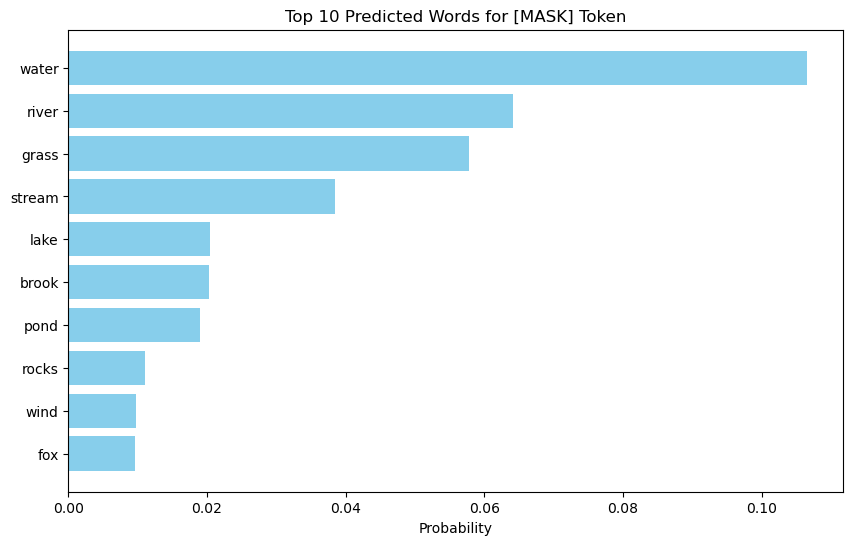

In [8]:
import torch
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertForMaskedLM
from torch.nn.functional import softmax

# BERT 모델과 토크나이저 불러오기
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForMaskedLM.from_pretrained(model_name)

# 예시 문장 (마스크된 단어 예측)
text = "The quick brown fox jumps over the lazy [MASK]."

# 입력 텍스트를 토크나이징
inputs = tokenizer(text, return_tensors="pt")

# 모델을 평가 모드로 설정
model.eval()

# 마스크 토큰 위치 찾기
mask_token_index = torch.where(inputs.input_ids == tokenizer.mask_token_id)[1].item()

# 모델 예측
with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits

# 마스크된 토큰에 대한 확률 분포
mask_token_logits = logits[0, mask_token_index]
mask_token_probs = softmax(mask_token_logits, dim=-1)

# 상위 10개의 예측된 단어와 그 확률
top_k = 10
top_k_indices = torch.topk(mask_token_probs, top_k).indices
top_k_probs = mask_token_probs[top_k_indices]
top_k_tokens = tokenizer.convert_ids_to_tokens(top_k_indices)

# 예측된 단어들 출력
for token, prob in zip(top_k_tokens, top_k_probs):
    print(f"{token}: {prob.item():.4f}")

# 시각화: 상위 10개 예측된 단어와 그 확률을 바 차트로 그리기
plt.figure(figsize=(10, 6))
plt.barh(top_k_tokens, top_k_probs.numpy(), color='skyblue')
plt.xlabel('Probability')
plt.title('Top 10 Predicted Words for [MASK] Token')
plt.gca().invert_yaxis()  # 상위 항목이 위에 오도록 설정
plt.show()


- **상위 10개 예측 단어 추출** : torch.topk()를 사용하여 가장 확률이 높은 10개의 단어를 추출하고, tokenizer.convert_ids_to_tokens()로 ID를 다시 단어로 변환합니다.

- **확률 출력** : 각 단어와 그 확률 값을 출력합니다.

- **시각화** : matplotlib.pyplot의 barh()를 사용해 상위 10개 단어와 그 확률을 수평 바 차트로 시각화하고, invert_yaxis()를 사용하여 확률이 높은 단어가 위에 오도록 설정합니다.

## 15.4 성별 질문 BERT 모델

1. 데이터셋 준비

- 이 예제에서는 간단한 예시 데이터셋을 사용합니다. 성별을 예측하는 데 사용할 텍스트 데이터는 이 사람은 남성인가요, 여성인가요?와 같은 문장이 될 수 있습니다. 

이 데이터를 직접 작성하거나 datasets 라이브러리에서 가져올 수도 있지만, 여기서는 예시 데이터셋을 간단히 만들어보겠습니다.

In [9]:
%pip install datasets

Note: you may need to restart the kernel to use updated packages.


In [10]:
import torch
from torch.utils.data import DataLoader
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from datasets import Dataset

# 예시 데이터셋
data = [
    {"text": "이 사람은 남성인가요?", "label": 0},  # 0: 남성
    {"text": "이 사람은 여성인가요?", "label": 1},  # 1: 여성
    {"text": "이 사람은 남자인가요?", "label": 0},  # 0: 남성
    {"text": "이 사람은 여자인가요?", "label": 1},  # 1: 여성
]

# Hugging Face의 Dataset 객체로 변환
dataset = Dataset.from_dict({
    "text": [item["text"] for item in data],
    "label": [item["label"] for item in data]
})

# BERT 토크나이저 로드
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# 텍스트를 토큰화하는 함수
def preprocess_function(examples):
    return tokenizer(examples['text'], padding=True, truncation=True)

# 데이터셋에 전처리 적용
encoded_dataset = dataset.map(preprocess_function, batched=True)

# DataLoader 준비 - PyTorch 텐서로 반환하도록 설정
encoded_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])

# DataLoader 준비
train_dataloader = DataLoader(encoded_dataset, batch_size=2, shuffle=True)

Map:   0%|          | 0/4 [00:00<?, ? examples/s]

2. 모델 준비
- BERT 모델을 불러오고, 성별을 분류할 수 있도록 fine-tuning 합니다.

In [11]:
# BERT 모델 불러오기
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# AdamW 옵티마이저 설정
optimizer = AdamW(model.parameters(), lr=1e-5)

# 모델을 GPU로 이동 (가능한 경우)
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/lib/python3.12/site-packages/transformers/optimization.py:640: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

4. 훈련 루프
- 모델을 훈련시킬 루프를 작성합니다.

In [12]:
# 훈련 함수
def train(model, dataloader, optimizer, device):
    model.train()  # 모델을 훈련 모드로 설정
    for batch in dataloader:
        # 배치가 이제 torch 텐서 형태이므로 'to(device)'로 GPU로 이동
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        optimizer.zero_grad()  # 옵티마이저 초기화
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss  # 손실 값
        loss.backward()  # 역전파
        optimizer.step()  # 옵티마이저 단계 업데이트

        print(f"Loss: {loss.item():.4f}")  # 손실 값 출력

# 훈련 실행
train(model, train_dataloader, optimizer, device)

# 평가 함수
def evaluate(model, dataloader, device):
    model.eval()  # 모델을 평가 모드로 설정
    correct = 0
    total = 0
    with torch.no_grad():  # 평가시 그래디언트 계산을 하지 않음
        for batch in dataloader:
            # 배치가 이제 torch 텐서 형태이므로 'to(device)'로 GPU로 이동
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask)
            predictions = torch.argmax(outputs.logits, dim=-1)  # 가장 높은 확률의 클래스를 예측

            correct += (predictions == labels).sum().item()  # 예측이 맞는 수
            total += labels.size(0)  # 총 샘플 수

    accuracy = correct / total
    print(f"Accuracy: {accuracy * 100:.2f}%")

# 평가 실행
evaluate(model, train_dataloader, device)


Loss: 0.5663
Loss: 1.0530
Accuracy: 50.00%


print(f"Loss: {loss.item():.4f}")에서 .item()은 텐서를 Python 숫자 타입으로 변환하며, :.4f는 소수점 4자리까지 출력하라는 뜻입니다.

BERT 모델이 성별 분류 작업을 위해 fine-tuning되고, 훈련 후 정확도가 출력됩니다.

이 예제는 기본적인 구조로, 실제 성별 분류 모델을 구축할 때에는 더 많은 데이터와, 더 복잡한 전처리 및 평가 절차가 필요할 수 있습니다. 

예를 들어, 더 많은 텍스트 데이터와 다양한 문장을 사용하여 모델을 훈련하는 것이 중요합니다.

In [13]:
%pip install transformers datasets torch

Note: you may need to restart the kernel to use updated packages.


### 3. 코드 설명

#### 데이터셋 준비

* **`load_dataset('imdb')`**: Hugging Face의 `datasets` 라이브러리를 사용하여 IMDB 영화 리뷰 데이터셋을 불러옵니다. 이 데이터셋은 영화 리뷰를 바탕으로 긍정적/부정적 감정을 분류하는 작업을 수행하는데 사용됩니다.
* **`tokenizer`**: BERT 모델에서 사용하는 토크나이저를 로드합니다. 이 토크나이저는 텍스트를 BERT 모델이 처리할 수 있는 토큰으로 변환합니다.

#### 데이터 전처리

* **`tokenize_function`**: 텍스트를 BERT 입력 형식에 맞게 토큰화합니다. `padding='max_length'`와 `truncation=True`는 모든 문장을 최대 길이에 맞춰 패딩하거나 잘라내도록 설정합니다.
* **`train_dataset`과 `test_dataset`**: 학습 데이터와 테스트 데이터를 각각 토큰화합니다.

#### 모델 준비

* **`BertForSequenceClassification`**: BERT 모델을 로드하고, 분류 작업을 위해 `num_labels=2`로 설정합니다 (긍정/부정 2가지 클래스).
* **`AdamW`**: AdamW 옵티마이저를 사용하여 모델을 최적화합니다.

#### 학습 및 평가 함수

* **`train` 함수**: 모델을 학습 모드로 설정하고, 각 배치에 대해 손실을 계산한 후 역전파를 수행하여 모델의 가중치를 업데이트합니다.
* **`evaluate` 함수**: 모델을 평가 모드로 설정하고, 테스트 데이터셋에 대해 예측을 수행한 후 정확도를 계산합니다.

#### 학습 및 평가 루프

* **`num_epochs`**: 총 학습 횟수입니다. 각 에폭마다 학습을 진행하고 평가를 수행합니다.

### 4. 실행 결과

이 코드를 실행하면 학습 중 손실 값과 평가 후 정확도가 출력됩니다. 이 예제는 간단한 영화 리뷰 감정 분석을 위한 BERT 모델을 학습시키고 평가하는 코드입니다.

### 5. 참고 사항

* **GPU 사용**: `device = torch.device("cuda" if torch.cuda.is_available() else "cpu")` 코드에서 GPU가 사용 가능하면 GPU를, 그렇지 않으면 CPU를 사용하도록 설정합니다.
* **배치 크기**: `train_dataloader`와 `test_dataloader`의 배치 크기를 16으로 설정했지만, 필요에 따라 이 값을 조정할 수 있습니다.

### 6. 최종 목표

이 코드는 BERT 모델을 파이토치로 구현하여, 텍스트 분류 작업(여기서는 영화 리뷰 감정 분석)을 수행하는 예제입니다. 이와 같은 방식으로 다양한 NLP 작업에 BERT를 활용할 수 있습니다.

In [14]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())

2.2.2
False


-----

https://velog.io/@seolini43/일상연애-주제의-한국어-대화-BERT로-이진-분류-모델-만들기파이썬Colab-코드

# **네이버 영화리뷰 감정분석 with Hugging Face BERT**

BERT(Bidirectional Encoder Representations from Transformers)는 구글이 개발한 사전훈련(pre-training) 모델입니다. 

위키피디아 같은 텍스트 코퍼스를 사용해서 미리 학습을 하면, 언어의 기본적인 패턴을 이해한 모델이 만들어집니다. 

이를 기반으로 새로운 문제에 적용하는 전이학습(transfer learning)을 수행합니다. 좀 더 적은 데이터로 보다 빠르게 학습이 가능하다는 장점이 있습니다. 그래서 최근 자연어처리의 핵심 기법으로 떠오르고 있습니다.

이 예제에서는 한글 NLP의 Hello world라고 할 수 있는 네이버 영화리뷰 감정분석을 구현해보겠습니다. 

가장 유명한 모델 중 하나인 Hugging Face의 PyTorch BERT를 사용하였습니다. 아래의 Chris McCormick의 블로그를 참조하여 한글에 맞게 수정하였음을 미리 알려드립니다.

< BERT Fine-Tuning Tutorial with PyTorch ><br>
-> https://mccormickml.com/2019/07/22/BERT-fine-tuning
<br>
<br>
<br>
BERT에 대해서 좀 더 자세한 설명은 아래 블로그를 참조하시기 바랍니다.

< BERT 톺아보기 ><br>
-> http://docs.likejazz.com/bert/

< The Illustrated BERT, ELMo, and co. (How NLP Cracked Transfer Learning) ><br>
-> http://jalammar.github.io/illustrated-bert/
<br>
<br>


# **준비 사항**

In [15]:
# Hugging Face의 트랜스포머 모델을 설치
!pip install transformers

In [16]:
import tensorflow as tf
import torch

from transformers import BertTokenizer
from transformers import BertForSequenceClassification, AdamW, BertConfig
from transformers import get_linear_schedule_with_warmup
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import random
import time
import datetime

# **데이터 로드**

In [17]:
# 네이버 영화리뷰 감정분석 데이터 다운로드
!git clone https://github.com/aebonlee/nsmc

Cloning into 'nsmc'...
remote: Enumerating objects: 14762, done.
remote: Counting objects: 100% (14761/14761), done.
remote: Compressing objects: 100% (13011/13011), done.
remote: Total 14762 (delta 1748), reused 14761 (delta 1748), pack-reused 1 (from 1)
Receiving objects: 100% (14762/14762), 56.19 MiB | 6.78 MiB/s, done.
Resolving deltas: 100% (1748/1748), done.
Updating files: 100% (14737/14737), done.


- 네이버 영화리뷰 감정분석 데이터를 Github에서 다운로드 합니다. 아래와 같이 nsmc 디렉토리에 있는 ratings_train.txt와 ratings_test.txt를 사용하겠습니다.

In [18]:
import os
import locale

# 한글 로케일 설정 (Linux/Windows 모두 호환)
locale.setlocale(locale.LC_ALL, 'ko_KR.UTF-8')

# 디렉토리 경로 설정
directory = "./nsmc"

# 파일 목록 출력
try:
    files = os.listdir(directory)
    print(f"디렉토리 '{directory}'의 파일 목록:")
    for file in files:
        print(file)
except FileNotFoundError:
    print(f"디렉토리 '{directory}'를 찾을 수 없습니다.")

# 디렉토리의 파일 목록
# !dir nsmc -la


디렉토리 './nsmc'의 파일 목록:
ratings_test.txt
ratings.txt
synopses.json
.DS_Store
code
README.md
ratings_train.txt
.git
raw


In [19]:
# 판다스로 훈련셋과 테스트셋 데이터 로드
train = pd.read_csv("nsmc/ratings_train.txt", sep='\t')
test = pd.read_csv("nsmc/ratings_test.txt", sep='\t')

print(train.shape)
print(test.shape)

(150000, 3)
(50000, 3)


훈련셋 150,000개와 테스트셋 50,000개의 데이터가 존재합니다.
<br>
<br>
<br>

In [20]:
# 훈련셋의 앞부분 출력
train.head(10)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
5,5403919,막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.,0
6,7797314,원작의 긴장감을 제대로 살려내지못했다.,0
7,9443947,별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단...,0
8,7156791,액션이 없는데도 재미 있는 몇안되는 영화,1
9,5912145,왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?,1


id는 회원정보, document는 리뷰 문장입니다. label이 0이면 부정, 1이면 긍정으로 분류됩니다. id는 사용하지 않기 때문에 document와 label만 추출하겠습니다.

# **전처리 - 훈련셋**

In [21]:
# 리뷰 문장 추출
sentences = train['document']
sentences[:10]

0                                  아 더빙.. 진짜 짜증나네요 목소리
1                    흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
2                                    너무재밓었다그래서보는것을추천한다
3                        교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정
4    사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...
5        막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.
6                                원작의 긴장감을 제대로 살려내지못했다.
7    별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단...
8                               액션이 없는데도 재미 있는 몇안되는 영화
9        왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?
Name: document, dtype: object

In [22]:
# BERT의 입력 형식에 맞게 변환
sentences = ["[CLS] " + str(sentence) + " [SEP]" for sentence in sentences]
sentences[:10]

['[CLS] 아 더빙.. 진짜 짜증나네요 목소리 [SEP]',
 '[CLS] 흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나 [SEP]',
 '[CLS] 너무재밓었다그래서보는것을추천한다 [SEP]',
 '[CLS] 교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정 [SEP]',
 '[CLS] 사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다 [SEP]',
 '[CLS] 막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움. [SEP]',
 '[CLS] 원작의 긴장감을 제대로 살려내지못했다. [SEP]',
 '[CLS] 별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단 낫겟다 납치.감금만반복반복..이드라마는 가족도없다 연기못하는사람만모엿네 [SEP]',
 '[CLS] 액션이 없는데도 재미 있는 몇안되는 영화 [SEP]',
 '[CLS] 왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나? [SEP]']

![대체 텍스트](https://mino-park7.github.io/images/2019/02/bert-input-representation.png)

BERT의 입력은 위의 그림과 같은 형식입니다. Classification을 뜻하는 [CLS] 심볼이 제일 앞에 삽입됩니다. 파인튜닝시 출력에서 이 위치의 값을 사용하여 분류를 합니다. [SEP]은 Seperation을 가리키는데, 두 문장을 구분하는 역할을 합니다. 이 예제에서는 문장이 하나이므로 [SEP]도 하나만 넣습니다.
<br>
<br>
<br>

In [23]:
# 라벨 추출
labels = train['label'].values
labels

array([0, 1, 0, ..., 0, 1, 0])

In [24]:
# BERT의 토크나이저로 문장을 토큰으로 분리
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased', do_lower_case=False)
tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]

print (sentences[0])
print (tokenized_texts[0])

[CLS] 아 더빙.. 진짜 짜증나네요 목소리 [SEP]
['[CLS]', '아', '더', '##빙', '.', '.', '진', '##짜', '짜', '##증', '##나', '##네', '##요', '목', '##소', '##리', '[SEP]']


BERT는 형태소분석으로 토큰을 분리하지 않습니다. WordPiece라는 통계적인 방식을 사용합니다. 한 단어내에서 자주 나오는 글자들을 붙여서 하나의 토큰으로 만듭니다. 이렇게 하면 언어에 상관없이 토큰을 생성할 수 있다는 장점이 있습니다. 또한 신조어 같이 사전에 없는 단어를 처리하기도 좋습니다.

위의 결과에서 ## 기호는 앞 토큰과 이어진다는 표시입니다. 토크나이저는 여러 언어의 데이터를 기반으로 만든 'bert-base-multilingual-cased'를 사용합니다. 그래서 한글도 처리가 가능합니다.
<br>
<br>
<br>

In [25]:
# 입력 토큰의 최대 시퀀스 길이
MAX_LEN = 128

# 토큰을 숫자 인덱스로 변환
input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]

# 문장을 MAX_LEN 길이에 맞게 자르고, 모자란 부분을 패딩 0으로 채움
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

input_ids[0]

array([   101,   9519,   9074, 119005,    119,    119,   9708, 119235,
         9715, 119230,  16439,  77884,  48549,   9284,  22333,  12692,
          102,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
      

보통 딥러닝 모델에는 토큰 자체를 입력으로 넣을 수 없습니다. 임베딩 레이어에는 토큰을 숫자로 된 인덱스로 변환하여 사용합니다. BERT의 토크나이저는 {단어토큰:인덱스}로 구성된 단어사전을 가지고 있습니다. 이를 참조하여 토큰을 인덱스로 바꿔줍니다.
<br>
<br>
<br>

In [26]:
# 어텐션 마스크 초기화
attention_masks = []

# 어텐션 마스크를 패딩이 아니면 1, 패딩이면 0으로 설정
# 패딩 부분은 BERT 모델에서 어텐션을 수행하지 않아 속도 향상
for seq in input_ids:
    seq_mask = [float(i>0) for i in seq]
    attention_masks.append(seq_mask)

print(attention_masks[0])

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [ ]:
# 훈련셋과 검증셋으로 분리
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids,
                                                                                    labels,
                                                                                    random_state=2018,
                                                                                    test_size=0.1)

# 어텐션 마스크를 훈련셋과 검증셋으로 분리
train_masks, validation_masks, _, _ = train_test_split(attention_masks,
                                                    input_ids,
                                                    random_state=2018,
                                                    test_size=0.1)

# 데이터를 파이토치의 텐서로 변환
train_inputs = torch.tensor(train_inputs)
train_labels = torch.tensor(train_labels)
train_masks = torch.tensor(train_masks)
validation_inputs = torch.tensor(validation_inputs)
validation_labels = torch.tensor(validation_labels)
validation_masks = torch.tensor(validation_masks)

print(train_inputs[0])
print(train_labels[0])
print(train_masks[0])
print(validation_inputs[0])
print(validation_labels[0])
print(validation_masks[0])

In [ ]:
# 배치 사이즈
batch_size = 32

# 파이토치의 DataLoader로 입력, 마스크, 라벨을 묶어 데이터 설정
# 학습시 배치 사이즈 만큼 데이터를 가져옴
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

# **전처리 - 테스트셋**

In [ ]:
# 리뷰 문장 추출
sentences = test['document']
sentences[:10]

In [ ]:
# BERT의 입력 형식에 맞게 변환
sentences = ["[CLS] " + str(sentence) + " [SEP]" for sentence in sentences]
sentences[:10]

In [ ]:
# 라벨 추출
labels = test['label'].values
labels

In [ ]:
# BERT의 토크나이저로 문장을 토큰으로 분리
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased', do_lower_case=False)
tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]

print (sentences[0])
print (tokenized_texts[0])

In [ ]:
# 입력 토큰의 최대 시퀀스 길이
MAX_LEN = 128

# 토큰을 숫자 인덱스로 변환
input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]

# 문장을 MAX_LEN 길이에 맞게 자르고, 모자란 부분을 패딩 0으로 채움
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

input_ids[0]

In [ ]:
# 어텐션 마스크 초기화
attention_masks = []

# 어텐션 마스크를 패딩이 아니면 1, 패딩이면 0으로 설정
# 패딩 부분은 BERT 모델에서 어텐션을 수행하지 않아 속도 향상
for seq in input_ids:
    seq_mask = [float(i>0) for i in seq]
    attention_masks.append(seq_mask)

print(attention_masks[0])

In [ ]:
# 데이터를 파이토치의 텐서로 변환
test_inputs = torch.tensor(input_ids)
test_labels = torch.tensor(labels)
test_masks = torch.tensor(attention_masks)

print(test_inputs[0])
print(test_labels[0])
print(test_masks[0])

In [ ]:
# 배치 사이즈
batch_size = 32

# 파이토치의 DataLoader로 입력, 마스크, 라벨을 묶어 데이터 설정
# 학습시 배치 사이즈 만큼 데이터를 가져옴
test_data = TensorDataset(test_inputs, test_masks, test_labels)
test_sampler = RandomSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

# **모델 생성**

In [ ]:
import torch

# Check if CUDA (GPU support) is available
if torch.cuda.is_available():
    device_name = torch.cuda.get_device_name(0)  # GPU 디바이스 이름
    print(f'Found GPU: {device_name}')
else:
    raise SystemError('GPU device not found')

In [ ]:
# 디바이스 설정
if torch.cuda.is_available():
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print('No GPU available, using the CPU instead.')

In [ ]:
# 분류를 위한 BERT 모델 생성
model = BertForSequenceClassification.from_pretrained("bert-base-multilingual-cased", num_labels=2)
model.cuda()

![대체 텍스트](http://www.mccormickml.com/assets/BERT/padding_and_mask.png)

사전훈련된 BERT는 다양한 문제로 전이학습이 가능합니다. 여기서는 위의 그림과 같이 한 문장을 분류하는 방법을 사용합니다. 영화리뷰 문장이 입력으로 들어가면, 긍정/부정으로 구분합니다. 모델의 출력에서 [CLS] 위치인 첫 번째 토큰에 새로운 레이어를 붙여서 파인튜닝을 합니다. Huggning Face는 BertForSequenceClassification() 함수를 제공하기 때문에 쉽게 구현할 수 있습니다.
<br>
<br>
<br>

In [ ]:
# 옵티마이저 설정
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # 학습률
                  eps = 1e-8 # 0으로 나누는 것을 방지하기 위한 epsilon 값
                )

# 에폭수
epochs = 4

# 총 훈련 스텝 : 배치반복 횟수 * 에폭
total_steps = len(train_dataloader) * epochs

# 처음에 학습률을 조금씩 변화시키는 스케줄러 생성
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps = 0,
                                            num_training_steps = total_steps)

# **모델 학습**

In [ ]:
# 정확도 계산 함수
def flat_accuracy(preds, labels):

    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
# 시간 표시 함수
def format_time(elapsed):

    # 반올림
    elapsed_rounded = int(round((elapsed)))

    # hh:mm:ss으로 형태 변경
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
# 재현을 위해 랜덤시드 고정
seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# 그래디언트 초기화
model.zero_grad()

# 에폭만큼 반복
for epoch_i in range(0, epochs):

    # ========================================
    #               Training
    # ========================================

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # 시작 시간 설정
    t0 = time.time()

    # 로스 초기화
    total_loss = 0

    # 훈련모드로 변경
    model.train()

    # 데이터로더에서 배치만큼 반복하여 가져옴
    for step, batch in enumerate(train_dataloader):
        # 경과 정보 표시
        if step % 500 == 0 and not step == 0:
            elapsed = format_time(time.time() - t0)
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # 배치를 GPU에 넣음
        batch = tuple(t.to(device) for t in batch)

        # 배치에서 데이터 추출
        b_input_ids, b_input_mask, b_labels = batch

        # Forward 수행
        outputs = model(b_input_ids,
                        token_type_ids=None,
                        attention_mask=b_input_mask,
                        labels=b_labels)

        # 로스 구함
        loss = outputs[0]

        # 총 로스 계산
        total_loss += loss.item()

        # Backward 수행으로 그래디언트 계산
        loss.backward()

        # 그래디언트 클리핑
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # 그래디언트를 통해 가중치 파라미터 업데이트
        optimizer.step()

        # 스케줄러로 학습률 감소
        scheduler.step()

        # 그래디언트 초기화
        model.zero_grad()

    # 평균 로스 계산
    avg_train_loss = total_loss / len(train_dataloader)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(format_time(time.time() - t0)))

    # ========================================
    #               Validation
    # ========================================

    print("")
    print("Running Validation...")

    #시작 시간 설정
    t0 = time.time()

    # 평가모드로 변경
    model.eval()

    # 변수 초기화
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0

    # 데이터로더에서 배치만큼 반복하여 가져옴
    for batch in validation_dataloader:
        # 배치를 GPU에 넣음
        batch = tuple(t.to(device) for t in batch)

        # 배치에서 데이터 추출
        b_input_ids, b_input_mask, b_labels = batch

        # 그래디언트 계산 안함
        with torch.no_grad():
            # Forward 수행
            outputs = model(b_input_ids,
                            token_type_ids=None,
                            attention_mask=b_input_mask)

        # 출력 로짓 구함
        logits = outputs[0]

        # CPU로 데이터 이동
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # 출력 로짓과 라벨을 비교하여 정확도 계산
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)
        eval_accuracy += tmp_eval_accuracy
        nb_eval_steps += 1

    print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
    print("  Validation took: {:}".format(format_time(time.time() - t0)))

print("")
print("Training complete!")

에폭마다 훈련셋과 검증셋을 반복하여 학습을 수행합니다.

# **테스트셋 평가**

In [ ]:
#시작 시간 설정
t0 = time.time()

# 평가모드로 변경
model.eval()

# 변수 초기화
eval_loss, eval_accuracy = 0, 0
nb_eval_steps, nb_eval_examples = 0, 0

# 데이터로더에서 배치만큼 반복하여 가져옴
for step, batch in enumerate(test_dataloader):
    # 경과 정보 표시
    if step % 100 == 0 and not step == 0:
        elapsed = format_time(time.time() - t0)
        print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(test_dataloader), elapsed))

    # 배치를 GPU에 넣음
    batch = tuple(t.to(device) for t in batch)

    # 배치에서 데이터 추출
    b_input_ids, b_input_mask, b_labels = batch

    # 그래디언트 계산 안함
    with torch.no_grad():
        # Forward 수행
        outputs = model(b_input_ids,
                        token_type_ids=None,
                        attention_mask=b_input_mask)

    # 출력 로짓 구함
    logits = outputs[0]

    # CPU로 데이터 이동
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    # 출력 로짓과 라벨을 비교하여 정확도 계산
    tmp_eval_accuracy = flat_accuracy(logits, label_ids)
    eval_accuracy += tmp_eval_accuracy
    nb_eval_steps += 1

print("")
print("Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
print("Test took: {:}".format(format_time(time.time() - t0)))

테스트셋의 정확도가 87%입니다. <BERT 톺아보기> 블로그에서는 같은 데이터로 88.7%를 달성하였습니다. 거기서는 한글 코퍼스로 사전훈련을 하여 새로운 모델을 만들었습니다. 반면에 우리는 BERT의 기본 모델인 bert-base-multilingual-cased를 사용했기 때문에 더 성능이 낮은 것 같습니다.

# **새로운 문장 테스트**

In [ ]:
# 입력 데이터 변환
def convert_input_data(sentences):

    # BERT의 토크나이저로 문장을 토큰으로 분리
    tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]

    # 입력 토큰의 최대 시퀀스 길이
    MAX_LEN = 128

    # 토큰을 숫자 인덱스로 변환
    input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]

    # 문장을 MAX_LEN 길이에 맞게 자르고, 모자란 부분을 패딩 0으로 채움
    input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

    # 어텐션 마스크 초기화
    attention_masks = []

    # 어텐션 마스크를 패딩이 아니면 1, 패딩이면 0으로 설정
    # 패딩 부분은 BERT 모델에서 어텐션을 수행하지 않아 속도 향상
    for seq in input_ids:
        seq_mask = [float(i>0) for i in seq]
        attention_masks.append(seq_mask)

    # 데이터를 파이토치의 텐서로 변환
    inputs = torch.tensor(input_ids)
    masks = torch.tensor(attention_masks)

    return inputs, masks

In [ ]:
# 문장 테스트
def test_sentences(sentences):

    # 평가모드로 변경
    model.eval()

    # 문장을 입력 데이터로 변환
    inputs, masks = convert_input_data(sentences)

    # 데이터를 GPU에 넣음
    b_input_ids = inputs.to(device)
    b_input_mask = masks.to(device)

    # 그래디언트 계산 안함
    with torch.no_grad():
        # Forward 수행
        outputs = model(b_input_ids,
                        token_type_ids=None,
                        attention_mask=b_input_mask)

    # 출력 로짓 구함
    logits = outputs[0]

    # CPU로 데이터 이동
    logits = logits.detach().cpu().numpy()

    return logits

In [ ]:
logits = test_sentences(['연기는 별로지만 재미 하나는 끝내줌!'])

print(logits)
print(np.argmax(logits))

In [ ]:
logits = test_sentences(['주연배우가 아깝다. 총체적 난국...'])

print(logits)
print(np.argmax(logits))

학습한 모델을 가지고 실제 문장을 넣어봤습니다.

출력 로짓은 소프트맥스가 적용되지 않은 상태입니다.

 argmax로 더 높은 값의 위치를 라벨로 설정하면 됩니다. 0은 부정, 1은 긍정입니다. 
 
 위와 같이 새로운 문장에도 잘 분류를 하고 있습니다.

< 챗봇 개발자 모임 ><br>
- 페이스북 그룹에 가입하시면 챗봇에 대한 최신 정보를 쉽게 받으실 수 있습니다.
- https://www.facebook.com/groups/ChatbotDevKR/